# <font color ='blue'>IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION</font>

> ## ROOMS DATASET

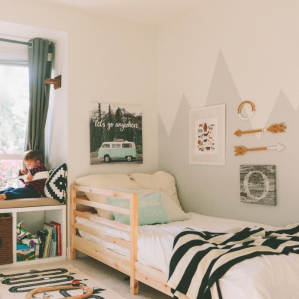

# DATASET OVERVIEW:

This dataset contains a total of 222 room images divided in three directories:Train(192),Test(10) and Validation(20). <br>
x:image <br>
y:0 or 1 (0 if room is dirty,1 if room is clean).

# OBJECTIVE:Visual Scene recognition
It is one of the determining tasks of the computer vision. 
This project is built using neural networks from scratch. It aims to predict whether a given room image is clean or messed. 

### IMPORT LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import seaborn as sns
from testCases_v3 import *;
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward;

### LOAD DATA

In [2]:
train_messy = "C:\\Users\\User\\Downloads\\images\\images\\train\\messy"
train_clean= "C:\\Users\\User\\Downloads\\images\\images\\train\\clean"
test_messy= "C:\\Users\\User\\Downloads\\images\\images\\val\\messy"
test_clean= "C:\\Users\\User\\Downloads\\images\\images\\val\\clean"
image_size = 128

### PRINT MESSY ROOM'S IMAGE

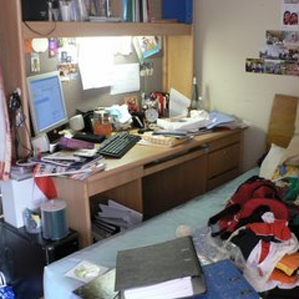

In [3]:
Image.open("C:\\Users\\User\\Downloads\\images\\images\\train\\messy\\89.png")

### PRINT CLEAN ROOM'S IMAGE

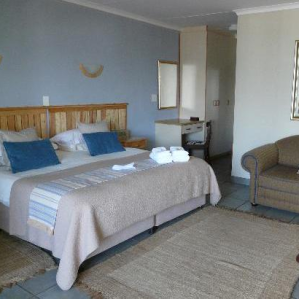

In [4]:
Image.open("C:\\Users\\User\\Downloads\\images\\images\\train\\clean\\70.png")

### CONVERTING IMAGE TO GRAYSCALE

100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 115.23it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

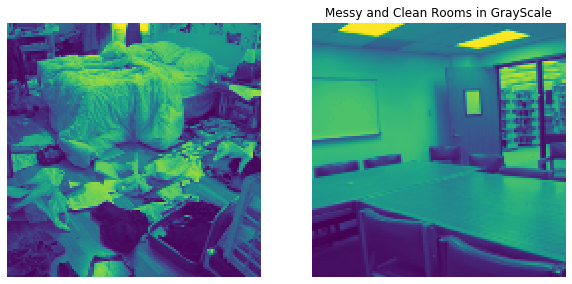

In [5]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

### DEFINING TRAIN DATA

In [6]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

### DEFINING TEST DATA

In [7]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 89.33it/s]


### CONCATENATING TRAIN AND TEST DATA

In [9]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [10]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [11]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

### DIMENSION OF X AND Y

In [12]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


### SPLITTING TRAIN AND TEST DATA:-85% TRAIN AND 15% TEST

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]


#### DIMENSION OF TRAIN AND TEST DATA

In [14]:
print("Number of images in Train data :",number_of_train)
print("Number of images in Test data :",number_of_test)

Number of images in Train data : 180
Number of images in Test data : 32


### CONVERTING INTO FEATURE VECTOR

In [15]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)
#flatten:-to convert 3d to 2d

X train flatten (180, 16384)
X test flatten (32, 16384)


### DIMENSION OF FEATURE VECTOR

In [16]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


## LOGISTIC REGRESSION:
Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more independent variables.

HELPER FUNCTION:We need to compute : $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [17]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) #filling value 0.01
    b = 0.0 #constant value
    return w, b

def sigmoid1(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid1(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid1(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 100: 0.032316
Cost after iteration 200: 0.014960
Cost after iteration 300: 0.009692
Cost after iteration 400: 0.007167
Cost after iteration 500: 0.005685
Cost after iteration 600: 0.004711
Cost after iteration 700: 0.004022
Cost after iteration 800: 0.003510
Cost after iteration 900: 0.003114
Cost after iteration 1000: 0.002799
Cost after iteration 1100: 0.002543
Cost after iteration 1200: 0.002330
Cost after iteration 1300: 0.002151
Cost after iteration 1400: 0.001997


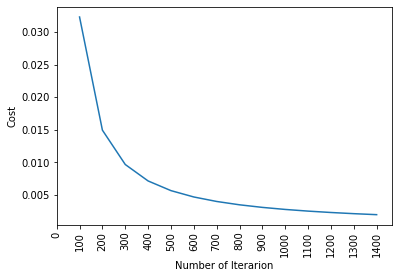

Test Accuracy: 90.62 %
Train Accuracy: 100.0 %


In [18]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

OPTIMISATION: At iteration 1400,minimum cost is found

### ACCURACY USING LOGREG MODEL

In [19]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test accuracy: 0.90625 


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 1.0 


### OUTPUT PREDICTIONS MADE BY THE MODEL

In [20]:
pred =logreg.predict(x_test.T)

In [21]:
pred

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.])

### ACTUAL OUTPUT

In [22]:
y_test

array([[1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

### CONFUSION MATRIX 

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.T,pred)

array([[16,  2],
       [ 1, 13]], dtype=int64)

### CONFUSION MATRIX USING HEAT MAP VISUALISATION

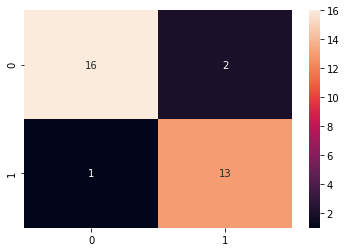

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
cm_dt= confusion_matrix(y_test.T,pred)
sns.heatmap(cm_dt, annot=True, fmt="d")


# <u>2 LAYER MODEL IMPLEMENTATION

2 HIDDEN LAYERS
In this part we use two different activation functions which are sigmoid and tanh. Firstly, we should initialize sigmoid function and tanh function.

In [25]:
def parameter_initialize(x_train,y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0])*0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3)*0.1,
                  "bias2" : np.zeros((y_train.shape[0],1))}
    
    print("Shape of weight1 : ",parameters["weight1"].shape)
    print("Shape of weight2 : ",parameters["weight2"].shape)
    print("Shape of bias1 : ",parameters["bias1"].shape)
    print("Shape of bias2 : ",parameters["bias2"].shape)

    return parameters
parameter_initialize(x_train,y_train)

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)


{'weight1': array([[ 0.09211658,  0.10435698, -0.02529913, ...,  0.08572727,
         -0.05707332, -0.05993684],
        [-0.05888531,  0.01943888,  0.05258266, ..., -0.07124806,
          0.16474776,  0.06404718],
        [ 0.00705329, -0.02071735, -0.05108967, ..., -0.01637727,
          0.15163614,  0.05787408]]),
 'bias1': array([[0.],
        [0.],
        [0.]]),
 'weight2': array([[0.10923238, 0.02817429, 0.02422446]]),
 'bias2': array([[0.]])}

### FORWARD PROPAGATION

In [26]:
def forward_propagation(x_train,parameters):
    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid1(Z2)
    
    results = {"Z1": Z1, "A1":A1,"Z2":Z2,"A2":A2}
    return A2, results

### COST FUNCTION FOR LOGISTIC REGRESSION

In [27]:
def cost(A2,Y):
    logaritmic_probability = np.multiply(np.log(A2),Y)
    cost = -np.sum(logaritmic_probability)/Y.shape[1]
    return cost

### BACKWARD PROPAGATION


In this part, we take derivative of weights, for weight1 and weight2, bais, for bais1 and bais2, results, for Z1 and Z2 according to cost.

In [28]:
def backward_propagation(parameters,results,X,Y):
    dZ2 = results["A2"]-Y
    dW2 = np.dot(dZ2,results["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1-np.power(results["A1"],2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis=1,keepdims = True)/X.shape[1]
    gradients = {"dweight1": dW1,
                "dweight2": dW2,
                "dbias1": db1,
                "dbias2":db2}
    return gradients

### UPDATE PARAMETERS

In [29]:
def update_prameters(parameters,grand,learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grand["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grand["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grand["dweight2"],
                  "bias2" : parameters["bias2"]-learning_rate*grand["dbias2"]
                 }
    return parameters

In [30]:
def prediction(parameters, x_test):
    A2, results = forward_propagation(x_test,parameters)
    prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            prediction[0,i] = 0
        else:
            prediction[0,i] = 1
    return prediction

Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)
Cost after iteration 0 0.333508
Cost after iteration 100 0.217733
Cost after iteration 200 0.154028
Cost after iteration 300 0.117238
Cost after iteration 400 0.097142
Cost after iteration 500 0.083117
Cost after iteration 600 0.071513
Cost after iteration 700 0.063535
Cost after iteration 800 0.056011
Cost after iteration 900 0.052062
Cost after iteration 1000 0.049115
Cost after iteration 1100 0.046743
Cost after iteration 1200 0.044783
Cost after iteration 1300 0.043135
Cost after iteration 1400 0.041731
Cost after iteration 1500 0.040519
Cost after iteration 1600 0.039463
Cost after iteration 1700 0.038532
Cost after iteration 1800 0.037702
Cost after iteration 1900 0.036946


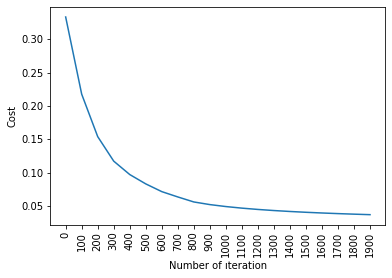

train accuracy: 97.22222222222223 %
test accuracy: 90.625 %


In [31]:
def two_layer_ANN_model(x_train, y_train, x_test, y_test, number_of_iteration):
    cost_list = []
    index = []
    parameters = parameter_initialize(x_train,y_train)
    for i in range(number_of_iteration):
        A2, results = forward_propagation(x_train,parameters)
        cost_result = cost(A2,y_train)
        gradients = backward_propagation(parameters,results,x_train,y_train)
        parameters = update_prameters(parameters, gradients)
        
        if i % 100 == 0:
            cost_list.append(cost_result)
            index.append(i)
            print("Cost after iteration %i %f" %(i,cost_result))
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of ıteration")
    plt.ylabel("Cost")
    plt.show()
    y_prediction_test = prediction(parameters,x_test)
    y_prediction_train = prediction(parameters,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_ANN_model(x_train,y_train,x_test,y_test,2000)

# L-layer Neural Network

In [32]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [33]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [34]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [35]:
def linear_forward_test_case():
    np.random.seed(1);
    A=np.random.randn(3,2);
    W=np.random.randn(1,3);
    b=np.random.randn(1,1);
    return A,W,b;

In [36]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [37]:
# GRADED FUNCTION: linear_activation_forward

def activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [38]:
def linear_activation_forward_test_case():
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W= np.random.randn(1,3)
    b= np.random.randn(1,1)
    return A_prev, W, b

In [39]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [40]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        A, cache = activation_forward(A_prev, W, b, activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    AL, cache = activation_forward(A, W, b, activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [41]:
def L_model_forward_test_case():
    np.random.seed(1);
    X = np.random.randn(4,2);
    W1 = np.random.randn(3,4);
    b1 = np.random.randn(3,1);
    W2 = np.random.randn(1,3);
    b2 = np.random.randn(1,1);
    parameters = {"W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2};
    return X, parameters;

In [42]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [43]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [44]:
def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]]);
    aL = np.array([[.8,.9,0.4]]);
    return Y, aL;

In [45]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [46]:
def relu_backward(dA, cache):
    Z = cache;
    dZ = np.array(dA, copy = True); # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0;
    assert (dZ.shape == Z.shape);
    return dZ;

In [47]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [48]:
def linear_backward_test_case():
    np.random.seed(1);
    dZ = np.random.randn(1,2);
    A = np.random.randn(3,2);
    W = np.random.randn(1,3);
    b = np.random.randn(1,1);
    linear_cache = (A, W, b);
    return dZ, linear_cache;

In [49]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case();
dA_prev, dW, db = linear_backward(dZ, linear_cache);
print ("dA_prev = "+ str(dA_prev));
print ("dW = " + str(dW));
print ("db = " + str(db));

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [50]:
# GRADED FUNCTION: linear_activation_backward

def activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [51]:
def linear_activation_backward_test_case():
    np.random.seed(2);
    dA = np.random.randn(1,2);
    A = np.random.randn(3,2);
    W = np.random.randn(1,3);
    b = np.random.randn(1,1);
    Z = np.random.randn(1,2);
    linear_cache = (A, W, b);
    activation_cache = Z;
    linear_activation_cache = (linear_cache, activation_cache);
    return dA, linear_activation_cache;

In [52]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [53]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    print("L = "+str(L))
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    print("dA"+ str(L-1)+" = "+str(grads["dA" + str(L-1)]))
    print("dW"+ str(L)+" = "+str(grads["dW" + str(L)]))
    print("db"+ str(L)+" = "+str(grads["db" + str(L)]))
    
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [54]:
def L_model_backward_test_case():
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])
    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)
    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)
    caches = (linear_cache_activation_1, linear_cache_activation_2)
    return AL, Y, caches

In [55]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [56]:
def update_parameters_test_case():
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}
    return parameters, grads


In [57]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


Shape of weight1 :  (3, 16384)
Shape of weight2 :  (1, 3)
Shape of bias1 :  (3, 1)
Shape of bias2 :  (1, 1)
Cost after iteration 0 0.379426
Cost after iteration 100 0.294900
Cost after iteration 200 0.230250
Cost after iteration 300 0.191069
Cost after iteration 400 0.146225
Cost after iteration 500 0.110332
Cost after iteration 600 0.090574
Cost after iteration 700 0.077525
Cost after iteration 800 0.068167
Cost after iteration 900 0.055142
Cost after iteration 1000 0.040897
Cost after iteration 1100 0.037040
Cost after iteration 1200 0.034095
Cost after iteration 1300 0.031689
Cost after iteration 1400 0.029650
Cost after iteration 1500 0.027816
Cost after iteration 1600 0.022908
Cost after iteration 1700 0.019500
Cost after iteration 1800 0.017444
Cost after iteration 1900 0.016293
Cost after iteration 2000 0.015410
Cost after iteration 2100 0.014657
Cost after iteration 2200 0.013992
Cost after iteration 2300 0.013396
Cost after iteration 2400 0.012857


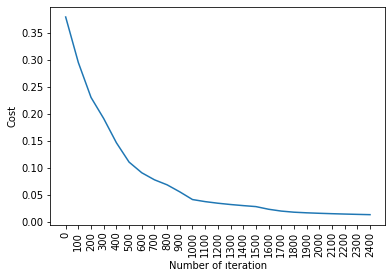

train accuracy: 99.44444444444444 %
test accuracy: 90.625 %


In [58]:
def l_layer_ANN_model(x_train, y_train, x_test, y_test, number_of_iteration):
    cost_list = []
    index = []
    parameters = parameter_initialize(x_train,y_train)
    for i in range(number_of_iteration):
        A2, results = forward_propagation(x_train,parameters)
        cost_result = cost(A2,y_train)
        gradients = backward_propagation(parameters,results,x_train,y_train)
        parameters = update_prameters(parameters, gradients)
        
        if i % 100 == 0:
            cost_list.append(cost_result)
            index.append(i)
            print("Cost after iteration %i %f" %(i,cost_result))
    plt.plot(index,cost_list)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of ıteration")
    plt.ylabel("Cost")
    plt.show()
    y_prediction_test = prediction(parameters,x_test)
    y_prediction_train = prediction(parameters,x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_ANN_model(x_train,y_train,x_test,y_test,2500)

# THANKYOU